<a href="https://colab.research.google.com/github/DennisDv24/Dl-model-optimization/blob/master/Dlconcepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

import keras

e = np.e

def drawFunction(size, resolution, function):
  Xreal = np.linspace(-size, size, resolution)
  plt.plot(Xreal, function(Xreal))
  plt.show

Using TensorFlow backend.


Linear

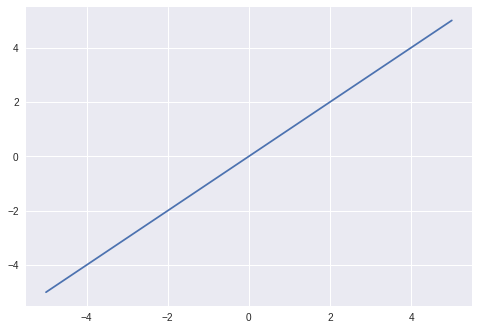

In [3]:
drawFunction(5,
             100,
             lambda x: x)

Sigmoid

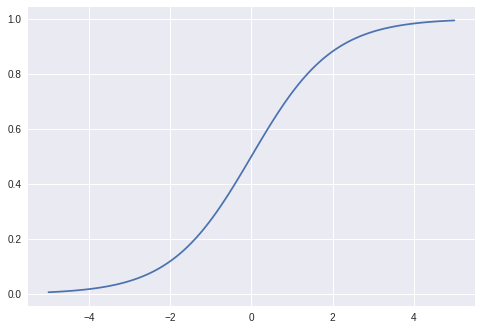

In [4]:
drawFunction(5,
             100,
             lambda x: 1/(1 + e ** (-x)))

Tanh

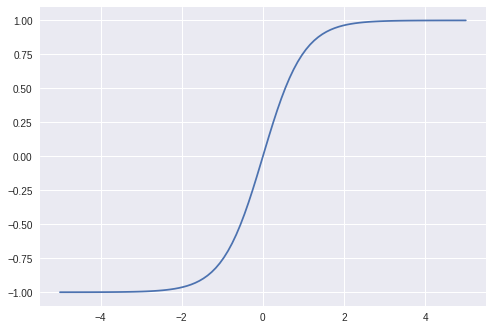

In [5]:
drawFunction(5,
             100,
             lambda x: (e ** x - e ** -x)/(e ** x + e ** -x))

ReLU

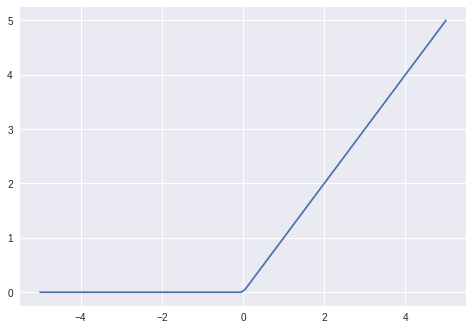

In [6]:
drawFunction(5,
             100,
             lambda x: np.maximum(0, x))

# Model optimization

> ## Parameterization










In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

(train_images, trail_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Data adjust

In [0]:
x_train = train_images.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

Model

In [9]:
model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_shape = (784, )))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size = 100
num_classes = 10
epochs = 5

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 0)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss); print('Test acc:', test_acc)

Instructions for updating:
Use tf.cast instead.
10000/10000 [==============================] - 0s 22us/step
Test loss: 1.256271350479126
Test acc: 0.7546
curca
